## **Materia: Elementos del aprendizaje y Big Data**
**TRABAJO FINAL**

Profesor: Valentín Barco

Grupo: 5


Interrogantes:

•	Macchia Sebastian

•	Paglino Guillermo

•	Peña Matias

•	Rodriguez Mikael

#Tendencias en las preferencias de cerveza

Introduccion: Este conjunto de datos contiene alrededor de 1,5 millones de reseñas de cervezas de BeerAdvocates.
Consigna: Su objetivo es caracterizar el conjunto de datos, agrupar cervezas similares y poder recomendar una cerveza, que preguntas podría responder utilizando los datos, por ejemplo: si tuviera que elegir 5 cervezas para recomendar, ¿cuál elegiría? ¿Por qué? ¿Cuáles de los factores (sabor, aroma, apariencia, paladar) son más importantes para determinar la la calidad general de una cerveza? Si por lo general disfruto de las IPA, ¿qué cerveza debo probar?

#Importacion de librerias a utlizar

In [1]:
# Pandas: Librería para manipulación y análisis de datos
import pandas as pd

# Numpy: Librería para realizar operaciones matemáticas en arreglos y matrices
import numpy as np

# Seaborn: Librería para visualización de datos basada en Matplotlib
import seaborn as sns

# Matplotlib: Librería de trazado para crear visualizaciones estáticas, animadas e interactivas en Python
import matplotlib.pyplot as plt

# StandardScaler: Herramienta de preprocesamiento para estandarizar características eliminando la media y escalando a la varianza unitaria
from sklearn.preprocessing import StandardScaler

# KMeans: Algoritmo de clustering K-Means para agrupar datos
from sklearn.cluster import KMeans

# KElbowVisualizer: Visualizador para ayudar a encontrar el número óptimo de clusters en K-Means
from yellowbrick.cluster import KElbowVisualizer

# ipywidgets: Librería para crear widgets interactivos en el entorno de Jupyter (Colab)
import ipywidgets as widgets

# IPython.display: Módulo para la gestión de la salida de las celdas en Jupyter (Colab)
from IPython.display import display

# SimpleImputer: Estrategias para imputar valores faltantes en datos
from sklearn.impute import SimpleImputer




# Cargar los datos


In [2]:
# URL de los conjuntos de datos de revisiones de cerveza
url_beer_reviews_1 = "https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBEE/data/beer_reviews_1.csv"
url_beer_reviews_2 = "https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBEE/data/beer_reviews_2.csv"

# Utilizando Pandas, se cargan los datos desde las URL y se almacenan en dos DataFrames separados
beer_reviews_1 = pd.read_csv(url_beer_reviews_1)
beer_reviews_2 = pd.read_csv(url_beer_reviews_2)



hay dos conjuntos de datos de revisiones de cerveza desde URLs específicas utilizando la función pd.read_csv() de Pandas. Los datos se almacenan en dos DataFrames diferentes, beer_reviews_1 y beer_reviews_2

# Combinacion (concatenacion) de los dos conjuntos de datos

In [3]:
# Utilizando la función concat de Pandas, se combinan los dos conjuntos de datos de revisiones de cerveza en uno solo
# El parámetro ignore_index=True reinicia los índices del DataFrame resultante
beer_reviews = pd.concat([beer_reviews_1, beer_reviews_2], ignore_index=True)


# Eliminacion de valores nulos y duplicados

In [4]:
# Se utiliza el método dropna() para eliminar filas que contienen valores nulos en el DataFrame beer_reviews
# Luego, se utiliza el método drop_duplicates() para eliminar filas duplicadas en el DataFrame resultante
beer_reviews = beer_reviews.dropna().drop_duplicates()


# Conversión de la columna 'review_time' a formato de fecha y hora

In [5]:
# Utilizando la función pd.to_datetime(), se convierte la columna 'review_time' del DataFrame beer_reviews
# La unidad de tiempo se especifica como segundos (unit='s')
beer_reviews['review_time'] = pd.to_datetime(beer_reviews['review_time'], unit='s')



Estadísticas descriptivas de las características principales

In [6]:
#Obtener estadísticas descriptivas de las características principales
beer_reviews.describe()


,brewery_id,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.518478e+06,1.518478e+06,1.518478e+06,1.518478e+06,1.518478e+06,1.518478e+06,1.518478e+06,1.518478e+06
mean,3.074306e+03,3.823938e+00,3.746218e+00,3.850383e+00,3.753735e+00,3.804082e+00,7.042488e+00,2.140575e+04
std,5.544339e+03,7.172663e-01,6.953440e-01,6.143106e-01,6.793350e-01,7.286079e-01,2.322568e+00,2.178033e+04
min,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,5.000000e+00
25%,1.410000e+02,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.654000e+03
50%,4.170000e+02,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.283000e+04
75%,2.298000e+03,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.923600e+04
max,2.800300e+04,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01,7.731600e+04


# Agrupación de datos por nombre de cerveza, cervecería y tipo de cerveza

In [7]:
# Utilizando el método groupby() de Pandas, se agrupan los datos del DataFrame beer_reviews
# La agrupación se realiza por las columnas "beer_name", "brewery_name" y "beer_style"
beer = beer_reviews.groupby(["beer_name", "brewery_name", "beer_style"])



# Ordenación de datos por valores promedio de reseñas de la cerveza y recuento total de reseñas


In [8]:
# Se crea un DataFrame beer_df con los valores promedio de las reseñas para cada grupo de cerveza
beer_df = pd.DataFrame(beer.mean())

# Se restablece el índice del DataFrame beer_df para extraer las columnas "brewery_name" y "beer_style"
ind_beer_rating_df = beer_df.reset_index(["brewery_name", "beer_style"])


<ipython-input-8-9491b5cb5c7c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  beer_df = pd.DataFrame(beer.mean())


**Mostrar los datos**

In [9]:
ind_beer_rating_df

,brewery_name,beer_style,brewery_id,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
beer_name,,,,,,,,,,
! (Old Ale),Närke Kulturbryggeri AB,Old Ale,10902.0,4.000000,4.5,4.00,4.000000,4.5,8.2,57645.0
"""100""",The Covey Restaurant & Brewery,Belgian Dark Ale,13338.0,4.000000,4.0,4.00,4.000000,4.4,10.0,49236.0
"""100"" Pale Ale",Aviator Brewing Company,American IPA,18635.0,4.000000,4.0,3.50,4.000000,4.0,6.6,50696.0
"""12"" Belgian Golden Strong Ale",Flossmoor Station Restaurant & Brewery,Belgian Strong Pale Ale,612.0,4.000000,3.5,4.25,4.750000,4.5,9.0,44353.0
"""33"" Export",Baltika-Baku,Dortmunder / Export Lager,13640.0,3.000000,3.0,3.00,3.166667,3.0,4.8,30080.0
...,...,...,...,...,...,...,...,...,...,...
Žamberecký Kanec Imperial Stout,Minipivovar Žamberk,Russian Imperial Stout,18230.0,3.750000,4.5,4.50,4.250000,4.0,5.5,45214.0
Ω-naught (Omeganaught),Three Floyds Brewing Co. & Brewpub,American IPA,26.0,4.166667,4.0,4.00,3.500000,3.5,5.0,49427.0
“Chewy” Double IPA,The Bobcat Café & Brewery,American IPA,7302.0,2.500000,2.0,4.00,3.500000,2.5,6.9,71197.0


# Creación de matriz de correlación para verificar las características relacionadas


<ipython-input-10-54b2645d6a2a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = ind_beer_rating_df.corr()


<Axes: >

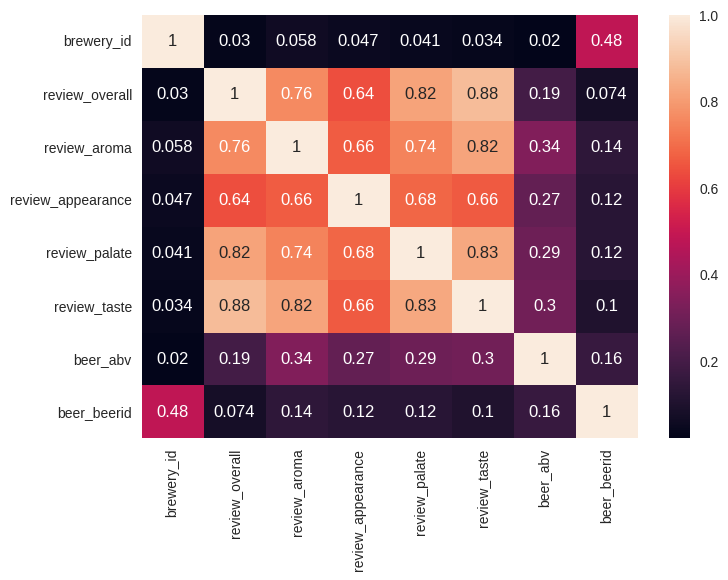

In [10]:
# Se calcula la matriz de correlación para el DataFrame ind_beer_rating_df
corr_matrix = ind_beer_rating_df.corr()

# Se utiliza Seaborn para crear un mapa de calor con la matriz de correlación
# El parámetro annot=True agrega los valores de correlación en cada celda del mapa de calor
sns.heatmap(corr_matrix, annot=True)




# Histograma y definición colores para cada característica

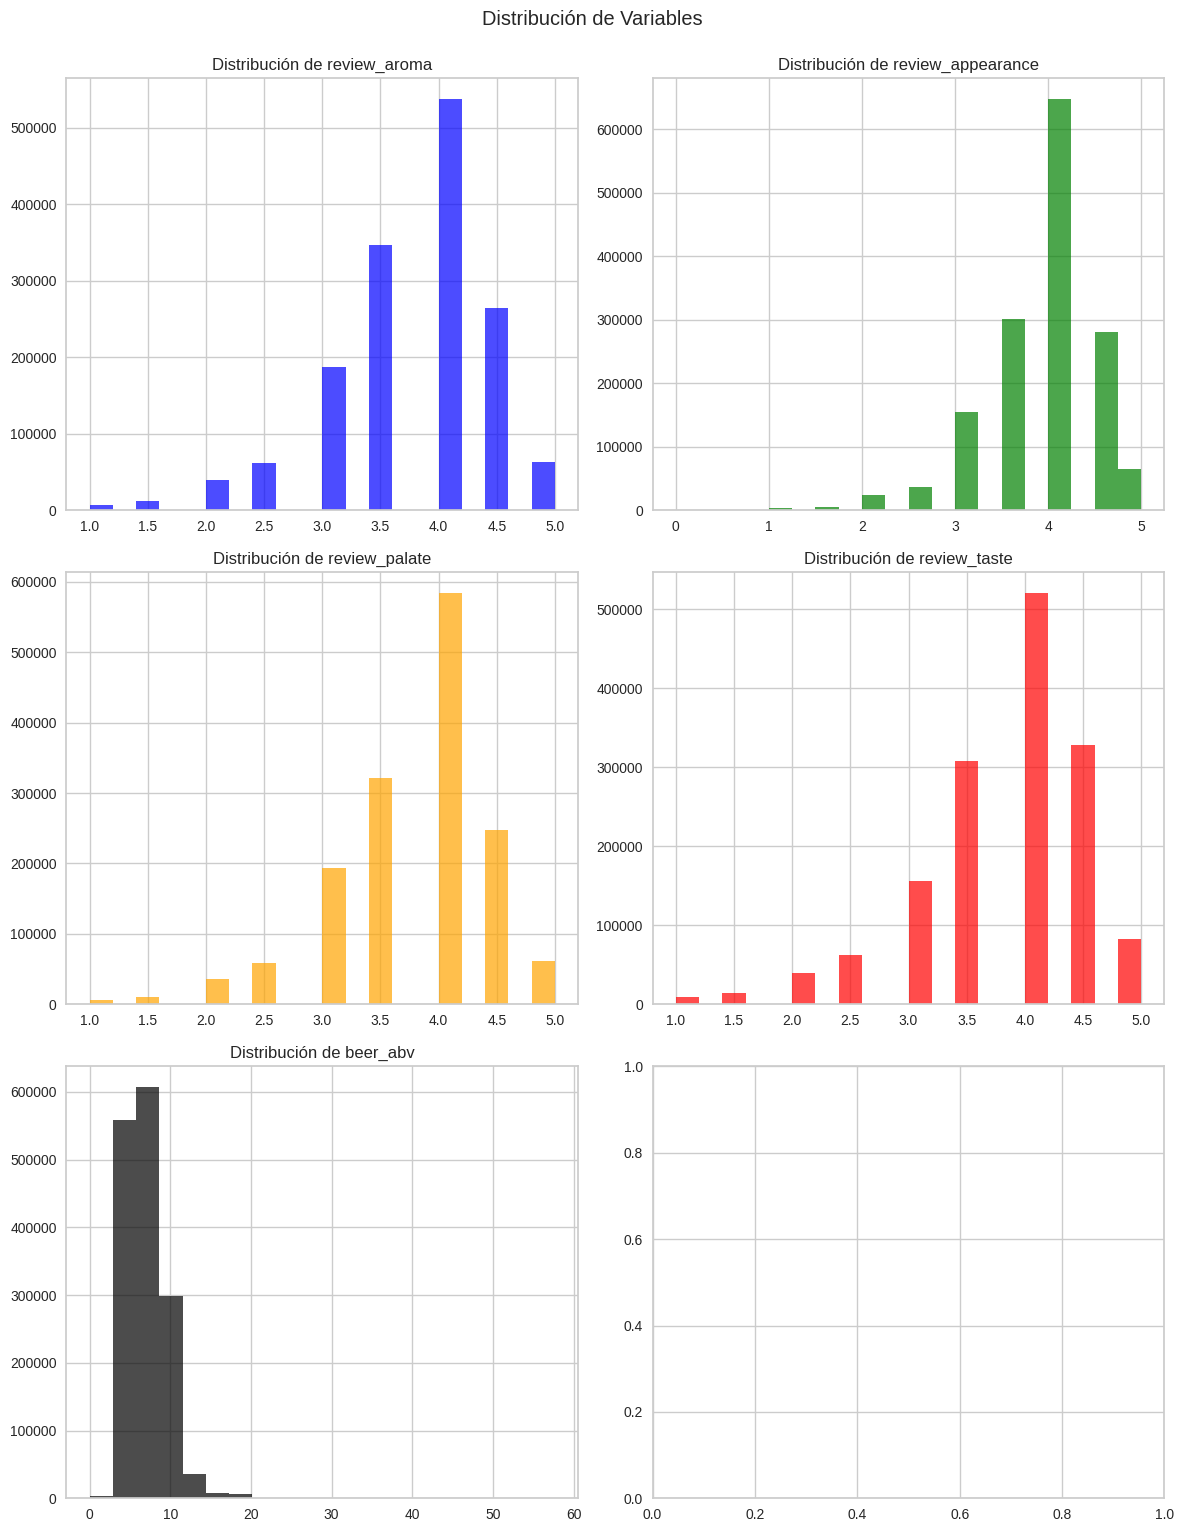

In [11]:
# Define colores para cada característica
colors = ['blue', 'green', 'orange', 'red', 'black']

# Crear subgráficos
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 15))

# Iterar sobre las características y colores
for i, (col, color) in enumerate(zip(['review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv'], colors)):
    beer_reviews[col].hist(bins=20, ax=axes[i // 2, i % 2], color=color, alpha=0.7)
    axes[i // 2, i % 2].set_title(f'Distribución de {col}')

# Ajustar el diseño y mostrar
plt.tight_layout()
plt.suptitle('Distribución de Variables', y=1.02)  # Ajustar la posición del título
plt.show()



# Selección de características de interés

In [12]:
# Se crea una lista llamada selected_features que contiene los nombres de las características seleccionadas
selected_features = ["review_aroma", "review_appearance", "review_palate", "review_taste", "beer_abv"]



# Determinación del número óptimo de clusters (k)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

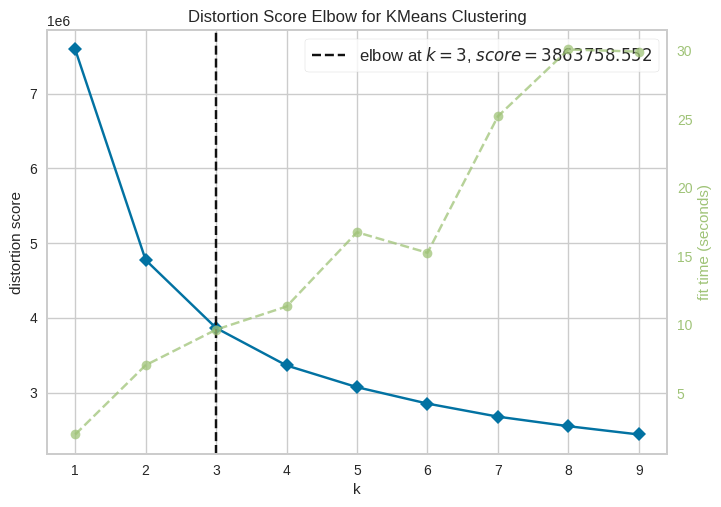

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
# Selecciona las características de interés del DataFrame beer_reviews
selected_data = beer_reviews[selected_features]

# Estandariza los datos utilizando StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(beer_reviews[selected_features])

# Utiliza el visualizador KElbowVisualizer para determinar el número óptimo de clusters (k)
# El rango de k se establece de 1 a 10, pero puedes ajustarlo según sea necesario
visualizer = KElbowVisualizer(KMeans(), k=(1, 10))
visualizer.fit(scaled_data)

# Muestra el gráfico que ayuda a determinar el número óptimo de clusters
visualizer.show()


# Selección del número óptimo de clusters (k)

In [14]:
# Se obtiene el número óptimo de clusters determinado por el visualizador KElbowVisualizer
num_clusters_optimal = visualizer.elbow_value_

# Muestra el número óptimo de clusters
print("el numero optimo de cluster, es el numero:", num_clusters_optimal)


el numero optimo de cluster, es el numero: 3


Copiamos el datafrasme original y entrenamos la copia con Kmeans

In [15]:
# Copiamos el DataFrame original
data_beer_cluster = beer_reviews.copy()


# Aplica K-means con el número óptimo de clusters
kmeans = KMeans(n_clusters=num_clusters_optimal, random_state=42)
data_beer_cluster["cluster"] = kmeans.fit_predict(scaled_data)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
data_beer_cluster

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,cluster
0,10325,Vecchio Birraio,2009-02-16 20:57:03,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986,0
1,10325,Vecchio Birraio,2009-03-01 13:44:57,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213,0
2,10325,Vecchio Birraio,2009-03-01 14:10:04,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215,0
3,10325,Vecchio Birraio,2009-02-15 19:12:25,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969,0
4,1075,Caldera Brewing Company,2010-12-30 18:53:26,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586609,14359,The Defiant Brewing Company,2006-11-05 00:01:32,5.0,4.0,3.5,maddogruss,Pumpkin Ale,4.0,4.0,The Horseman's Ale,5.2,33061,1
1586610,14359,The Defiant Brewing Company,2006-10-17 01:29:26,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,The Horseman's Ale,5.2,33061,1
1586611,14359,The Defiant Brewing Company,2006-10-13 01:21:53,4.5,3.5,3.0,TongoRad,Pumpkin Ale,3.5,4.0,The Horseman's Ale,5.2,33061,1
1586612,14359,The Defiant Brewing Company,2006-10-05 04:37:24,4.0,4.5,4.5,dherling,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061,2


Análisis de Resultados:
*Genera boxplots para cada cluster y cada característica seleccionada.*

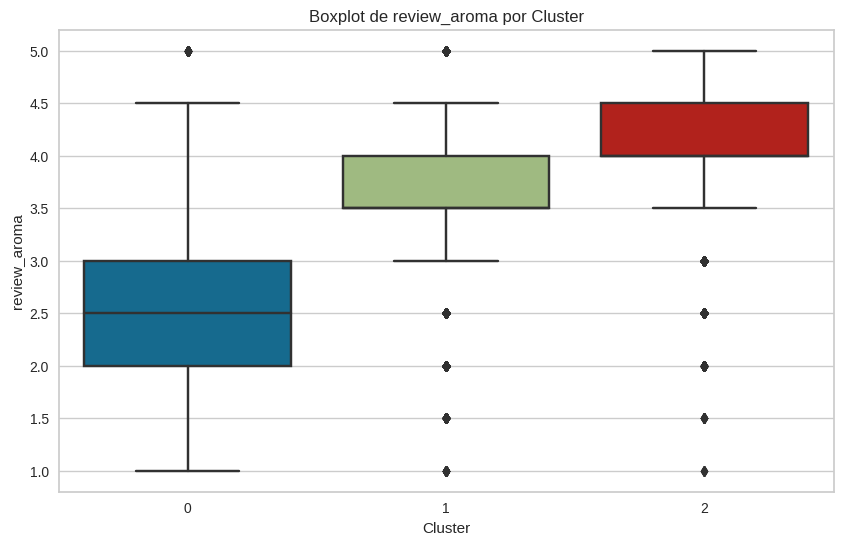

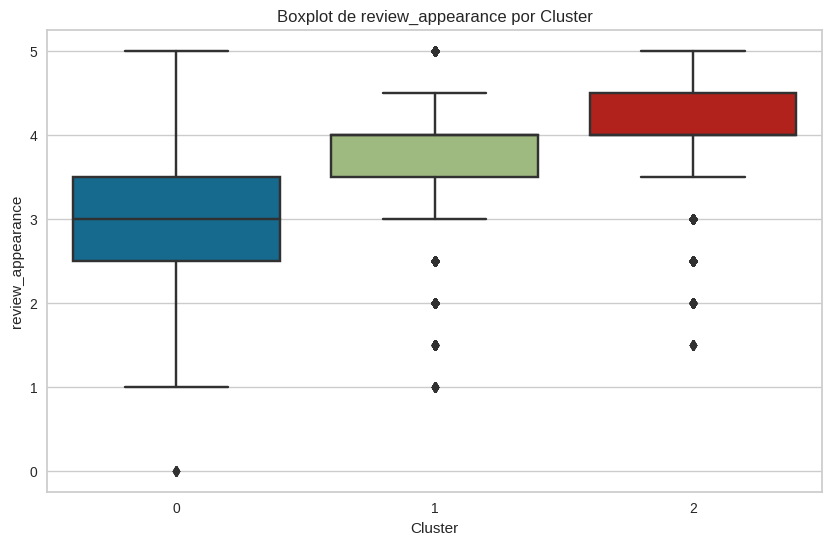

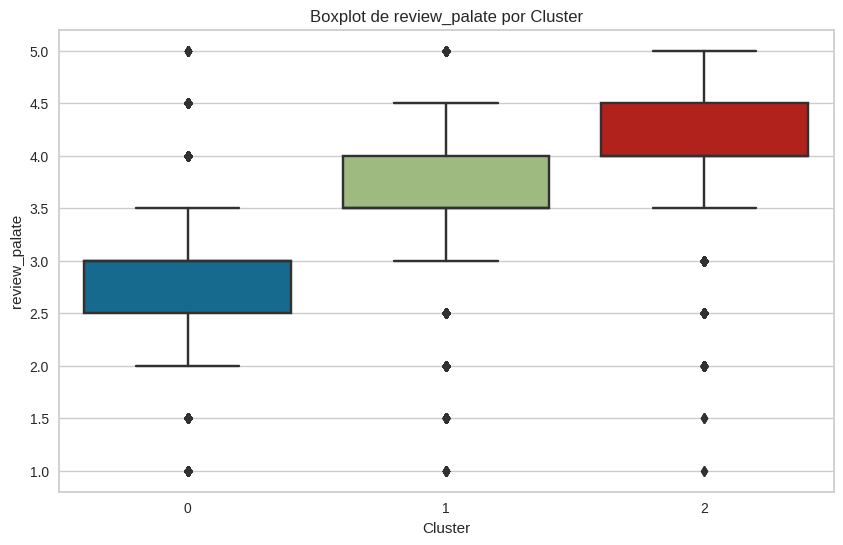

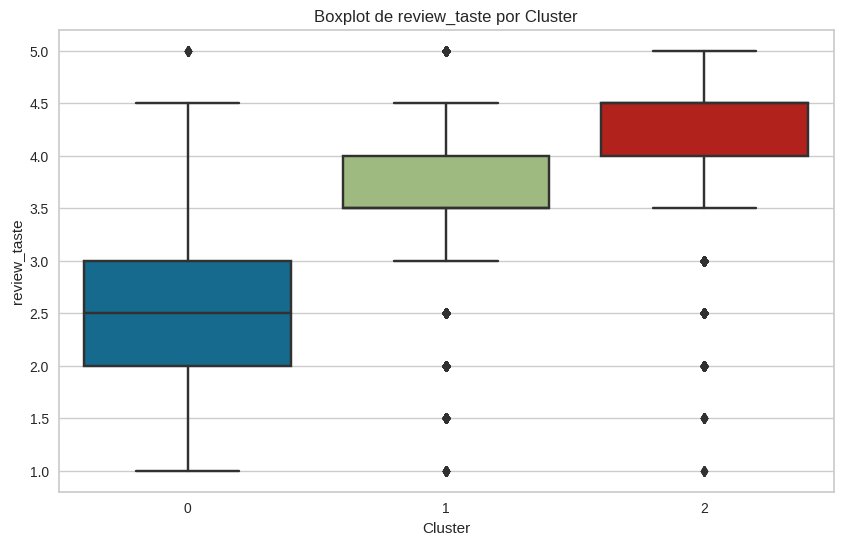

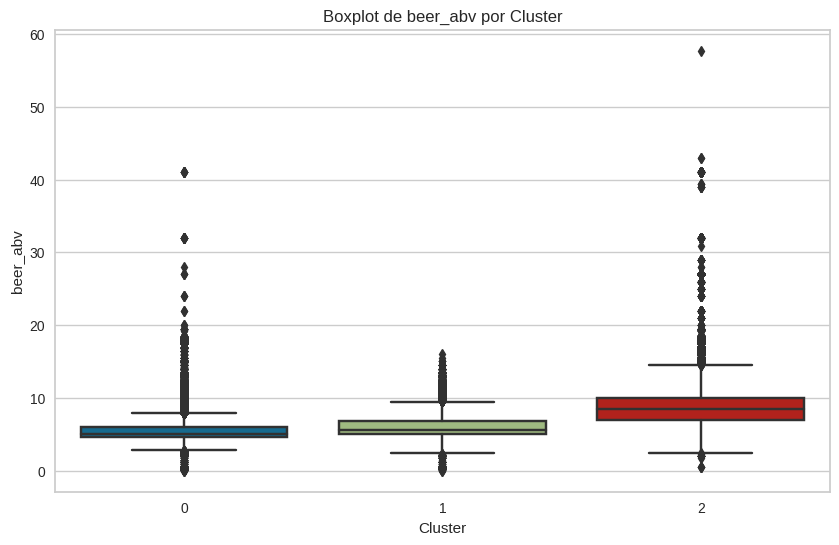

In [17]:
# Análisis de Resultados: Generación de boxplots

import seaborn as sns
import matplotlib.pyplot as plt

# Iterar sobre las características seleccionadas
for feature in selected_features:
    plt.figure(figsize=(10, 6))

    # Utilizar Seaborn para crear un boxplot para cada cluster
    sns.boxplot(x="cluster", y=feature, data=data_beer_cluster)

    # Configuración de etiquetas y título
    plt.title(f"Boxplot de {feature} por Cluster")
    plt.xlabel("Cluster")
    plt.ylabel(feature)

    # Mostrar el boxplot
    plt.show()


Basándonos en la interpretación de los boxplots generados para cada cluster y cada característica seleccionada, podríamos hacer observaciones tentativas sobre la posible interpretación de los clusters. Sin embargo, la interpretación exacta puede depender de la distribución específica de los datos y de la naturaleza de las características seleccionadas.

En general, si observas que el Cluster 0 tiene, por ejemplo, valores más bajos en las características de puntuación en comparación con los Clusters 1 y 2, podrías interpretar que el Cluster 0 representa cervezas con puntajes más bajos. Del mismo modo, si el Cluster 2 tiene valores más altos, podrías interpretar que representa cervezas con puntajes más altos. El Cluster 1, al tener valores intermedios, podría representar cervezas con puntajes medianos.

In [18]:
# Definir las condiciones y los valores a asignar
conditions = [
    data_beer_cluster['cluster'] == 0,
    data_beer_cluster['cluster'] == 1,
    data_beer_cluster['cluster'] == 2,
]

values = ["Menor Puntuación", "Puntuación Mediana", "Mejor Puntuación"]

# Agregar la columna 'Puntuación' basándose en las condiciones
data_beer_cluster['Puntuación'] = np.select(conditions, values, default="Otra Puntuación")


Hemos definido condiciones basadas en los valores de la columna 'cluster' y has asignado etiquetas específicas ('Menor Puntuación', 'Puntuación Mediana', 'Mejor Puntuación') según el cluster al que pertenece cada observación. Estas etiquetas se han agregado como una nueva columna llamada 'Puntuación'.

In [19]:
#Mostramos como quedaria el dataset
data_beer_cluster

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,cluster,Puntuación
0,10325,Vecchio Birraio,2009-02-16 20:57:03,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986,0,Menor Puntuación
1,10325,Vecchio Birraio,2009-03-01 13:44:57,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213,0,Menor Puntuación
2,10325,Vecchio Birraio,2009-03-01 14:10:04,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215,0,Menor Puntuación
3,10325,Vecchio Birraio,2009-02-15 19:12:25,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969,0,Menor Puntuación
4,1075,Caldera Brewing Company,2010-12-30 18:53:26,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883,2,Mejor Puntuación
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586609,14359,The Defiant Brewing Company,2006-11-05 00:01:32,5.0,4.0,3.5,maddogruss,Pumpkin Ale,4.0,4.0,The Horseman's Ale,5.2,33061,1,Puntuación Mediana
1586610,14359,The Defiant Brewing Company,2006-10-17 01:29:26,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,The Horseman's Ale,5.2,33061,1,Puntuación Mediana
1586611,14359,The Defiant Brewing Company,2006-10-13 01:21:53,4.5,3.5,3.0,TongoRad,Pumpkin Ale,3.5,4.0,The Horseman's Ale,5.2,33061,1,Puntuación Mediana
1586612,14359,The Defiant Brewing Company,2006-10-05 04:37:24,4.0,4.5,4.5,dherling,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061,2,Mejor Puntuación


Creamos un dataframe para ver las cervezas con puntuaciones mas bajas y lo muestro

In [20]:
# Filtrar datos para el cluster 0
puntuacion_baja = data_beer_cluster[data_beer_cluster['cluster'] == 0]

# Mostrar el DataFrame filtrado
puntuacion_baja


,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,cluster,Puntuación
0,10325,Vecchio Birraio,2009-02-16 20:57:03,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986,0,Menor Puntuación
1,10325,Vecchio Birraio,2009-03-01 13:44:57,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213,0,Menor Puntuación
2,10325,Vecchio Birraio,2009-03-01 14:10:04,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215,0,Menor Puntuación
3,10325,Vecchio Birraio,2009-02-15 19:12:25,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969,0,Menor Puntuación
7,1075,Caldera Brewing Company,2011-05-24 22:26:58,3.0,2.5,3.5,alpinebryant,Herbed / Spiced Beer,2.0,3.5,Caldera Ginger Beer,4.7,52159,0,Menor Puntuación
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586558,14359,The Defiant Brewing Company,2008-08-05 19:49:35,3.0,3.0,3.5,frankld2,American IPA,2.0,2.0,India Pale Ale,6.2,35185,0,Menor Puntuación
1586588,14359,The Defiant Brewing Company,2011-01-19 01:16:17,2.0,2.5,3.0,Buddha22,Belgian IPA,2.0,2.5,Bear Mountain Ale,8.0,62147,0,Menor Puntuación
1586589,14359,The Defiant Brewing Company,2011-01-02 22:05:29,1.0,4.0,4.5,JohnQVegas,Belgian IPA,3.0,1.0,Bear Mountain Ale,8.0,62147,0,Menor Puntuación
1586590,14359,The Defiant Brewing Company,2010-10-21 02:37:19,1.5,3.5,4.0,cpanossian,Belgian IPA,3.0,1.5,Bear Mountain Ale,8.0,62147,0,Menor Puntuación


Creamos un dataframe para ver las cervezas con puntuaciones media y lo muestro

In [21]:
# Filtrar datos para el cluster 1 y asignar a la variable puntuacion_media
puntuacion_media = data_beer_cluster[data_beer_cluster['cluster'] == 1]

# Mostrar el DataFrame filtrado
puntuacion_media


,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,cluster,Puntuación
5,1075,Caldera Brewing Company,2012-01-02 17:17:39,3.0,3.5,3.5,oline73,Herbed / Spiced Beer,3.0,3.5,Caldera Ginger Beer,4.7,52159,1,Puntuación Mediana
6,1075,Caldera Brewing Company,2011-10-19 02:25:15,3.5,3.5,3.5,Reidrover,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159,1,Puntuación Mediana
8,1075,Caldera Brewing Company,2010-11-22 19:35:03,4.0,3.0,3.5,LordAdmNelson,Herbed / Spiced Beer,3.5,4.0,Caldera Ginger Beer,4.7,52159,1,Puntuación Mediana
9,1075,Caldera Brewing Company,2010-09-28 00:15:24,4.5,3.5,5.0,augustgarage,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159,1,Puntuación Mediana
12,1075,Caldera Brewing Company,2010-06-26 13:13:10,4.0,4.0,4.0,rawthar,Herbed / Spiced Beer,3.5,4.0,Caldera Ginger Beer,4.7,52159,1,Puntuación Mediana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586604,14359,The Defiant Brewing Company,2010-11-04 17:03:26,4.0,4.5,4.5,njmoons,Pumpkin Ale,3.5,3.5,The Horseman's Ale,5.2,33061,1,Puntuación Mediana
1586608,14359,The Defiant Brewing Company,2006-11-05 00:17:36,3.5,4.0,4.0,treehugger02010,Pumpkin Ale,3.5,3.0,The Horseman's Ale,5.2,33061,1,Puntuación Mediana
1586609,14359,The Defiant Brewing Company,2006-11-05 00:01:32,5.0,4.0,3.5,maddogruss,Pumpkin Ale,4.0,4.0,The Horseman's Ale,5.2,33061,1,Puntuación Mediana
1586610,14359,The Defiant Brewing Company,2006-10-17 01:29:26,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,The Horseman's Ale,5.2,33061,1,Puntuación Mediana


Creamos un dataframe para las cervezas con puntuacion alta y lo muestro

In [22]:
# Filtrar datos para el cluster 2 y asignar a la variable puntuacion_alta
puntuacion_alta = data_beer_cluster[data_beer_cluster['cluster'] == 2]

# Mostrar el DataFrame filtrado
puntuacion_alta


,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,cluster,Puntuación
4,1075,Caldera Brewing Company,2010-12-30 18:53:26,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883,2,Mejor Puntuación
11,1075,Caldera Brewing Company,2010-08-30 07:46:05,5.0,5.0,4.0,MadeInOregon,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159,2,Mejor Puntuación
19,1075,Caldera Brewing Company,2012-01-02 04:20:04,4.5,4.5,3.0,UCLABrewN84,Rauchbier,4.0,4.5,Rauch Ür Bock,7.4,58046,2,Mejor Puntuación
21,1075,Caldera Brewing Company,2011-11-28 18:51:44,4.0,4.5,4.0,Tilley4,Rauchbier,3.5,4.0,Rauch Ür Bock,7.4,58046,2,Mejor Puntuación
22,1075,Caldera Brewing Company,2011-11-05 11:59:57,4.5,5.0,4.5,mikedrinksbeer2,Rauchbier,4.0,4.5,Rauch Ür Bock,7.4,58046,2,Mejor Puntuación
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586605,14359,The Defiant Brewing Company,2006-11-12 00:25:43,5.0,5.0,5.0,NyackNicky,Pumpkin Ale,5.0,5.0,The Horseman's Ale,5.2,33061,2,Mejor Puntuación
1586606,14359,The Defiant Brewing Company,2006-11-07 03:56:48,5.0,4.5,4.0,blitheringidiot,Pumpkin Ale,5.0,5.0,The Horseman's Ale,5.2,33061,2,Mejor Puntuación
1586607,14359,The Defiant Brewing Company,2006-11-07 02:14:00,5.0,5.0,4.5,PopeDX,Pumpkin Ale,5.0,4.5,The Horseman's Ale,5.2,33061,2,Mejor Puntuación
1586612,14359,The Defiant Brewing Company,2006-10-05 04:37:24,4.0,4.5,4.5,dherling,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061,2,Mejor Puntuación


# Creamos una función para recomendar cervezas


In [23]:
# Función para recomendar cervezas
def recomendar_cervezas(cluster):
    """
    Recomienda las mejores cervezas dentro de un cluster específico.

    Parámetros:
    - cluster: Número de cluster para el cual se quieren recomendar cervezas.

    Devuelve:
    - DataFrame con las mejores cervezas del cluster especificado.
    """
    # Filtrar datos para el cluster especificado
    cluster_data = data_beer_cluster[data_beer_cluster["cluster"] == cluster]

    # Ordenar cervezas por review_overall de forma descendente y tomar las primeras 5
    top_beers = cluster_data.sort_values("review_overall", ascending=False).head(5)

    # Seleccionar columnas relevantes para la recomendación
    recommendation = top_beers[["beer_name", "brewery_name", "review_overall", "beer_style"]]

    # Devolver el DataFrame con las mejores cervezas del cluster
    return recommendation


# Definir características seleccionadas para la interfaz

In [ ]:
# Definir características seleccionadas para la interfaz
selected_features = ['review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv']

# Crear diccionario de deslizadores para cada característica
feature_sliders = {feature: widgets.FloatSlider(
    value=3.0,
    min=1.0,
    max=5.0,
    step=0.1,
    description=f'{feature}:',
    style={'description_width': 'initial'}  # Ajustar el ancho de la descripción
) for feature in selected_features}

Crear Boton para mostrar recomendaciones

FloatSlider(value=3.0, description='review_aroma:', max=5.0, min=1.0, style=SliderStyle(description_width='ini…

FloatSlider(value=3.0, description='review_appearance:', max=5.0, min=1.0, style=SliderStyle(description_width…

FloatSlider(value=3.0, description='review_palate:', max=5.0, min=1.0, style=SliderStyle(description_width='in…

FloatSlider(value=3.0, description='review_taste:', max=5.0, min=1.0, style=SliderStyle(description_width='ini…

FloatSlider(value=3.0, description='beer_abv:', max=5.0, min=1.0, style=SliderStyle(description_width='initial…

Button(description='Mostrar Recomendaciones', style=ButtonStyle())


Listado de cervezas recomendadas:
                                             beer_name  \
443                                        Caldera IPA   
1729                                T.J.'s Best Bitter   
1768                                    Wobbly Bob APA   
2878                                Hop Dam Triple IPA   
3146                      Mean Manalishi Double I.P.A.   
...                                                ...   
1583864             Corsendonk Pater / Abbey Brown Ale   
1584917  Drake's Pinot Noir Barrel Aged Imperial Stout   
1585230                Drake's Barrel Aged Barley Wine   
1585355        Drake's Brandy Barrel Aged Jolly Rodger   
1586605                             The Horseman's Ale   

                        brewery_name  \
443          Caldera Brewing Company   
1729           Broad Ripple Brew Pub   
1768           Broad Ripple Brew Pub   
2878            Hoppin' Frog Brewery   
3146            Hoppin' Frog Brewery   
...                         

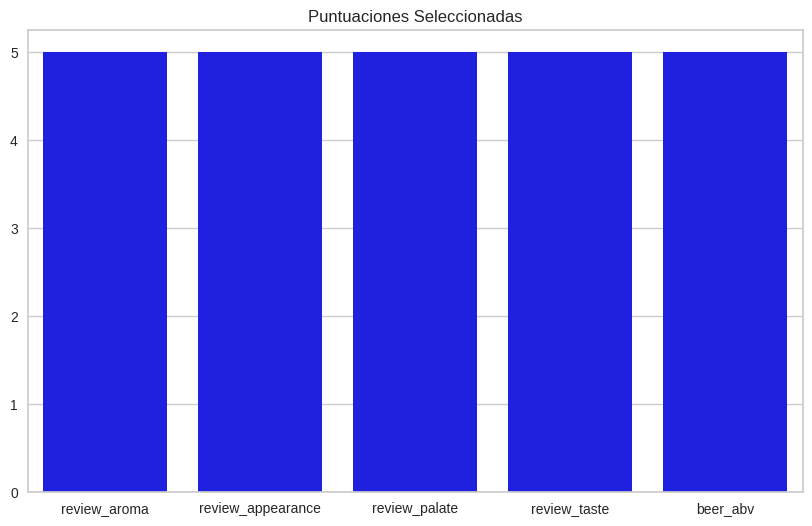

In [28]:
# Crear botón para mostrar recomendaciones
button = widgets.Button(description="Mostrar Recomendaciones")

# Función que se ejecuta al hacer clic en el botón
def on_button_click(b):
    # Obtener las puntuaciones seleccionadas por el usuario
    selected_scores = {feature: slider.value for feature, slider in feature_sliders.items()}

    # Asignar puntajes directamente a los clusters
    data_beer_cluster["score"] = data_beer_cluster["cluster"].map({
        i: selected_scores for i in range(num_clusters_optimal)
    })

    # Filtrar las cervezas según las puntuaciones seleccionadas por el usuario
    selected_beers = data_beer_cluster.copy()
    for feature, score in selected_scores.items():
        selected_beers = selected_beers[selected_beers[feature] >= score]

    # Mostrar el listado de cervezas recomendadas
    recommended_beers = selected_beers[['beer_name', 'brewery_name', 'score']]
    print("\nListado de cervezas recomendadas:")
    print(recommended_beers)

    # Visualización de las puntuaciones seleccionadas
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(selected_scores.keys()), y=list(selected_scores.values()), color='blue')
    plt.title('Puntuaciones Seleccionadas')
    plt.show()

# Asociar la función on_button_click al evento de hacer clic en el botón
button.on_click(on_button_click)

# Crear una lista de widgets para mostrar
widget_list = list(feature_sliders.values()) + [button]

# Mostrar los widgets
display(*widget_list)


#*Hemos creado una variacion del codigo anterior, por si el cliente ya sabe que marca o tipo de cerveza pretende, y con las caracteristicas que el desea*

Al igual que el anterior, el display es muy intuitivo y facil de usar. Realizando grafico de barras indicando la opcion seleccionada previo haber impreso una lista de las cervecerias y las marcas o nombres de cervezas, que el programa ha seleccionado.

In [25]:
# Definir características seleccionadas para la interfaz
selected_features = ['review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'beer_abv']

# Obtener la lista de estilos de cerveza únicos en tu conjunto de datos
beer_styles = data_beer_cluster['beer_style'].unique()

# Agregar la selección del estilo de cerveza
style_selector = widgets.Dropdown(
    options=list(beer_styles),
    value=beer_styles[0],
    description='Estilo de Cerveza:'
)

# Crear diccionario de deslizadores para cada característica
feature_sliders = {feature: widgets.FloatSlider(
    value=3.0,
    min=1.0,
    max=5.0,
    step=0.1,
    description=f'{feature}:',
    style={'description_width': 'initial'}  # Ajustar el ancho de la descripción
) for feature in selected_features}

# Crear botón para mostrar recomendaciones
button = widgets.Button(description="Mostrar Recomendaciones")

# Crear widget de salida para mostrar resultados de manera organizada
output_result = widgets.Output()

# Función que se ejecuta al hacer clic en el botón
def on_button_click(b):
    # Limpiar el widget de salida antes de mostrar nuevos resultados
    output_result.clear_output()

    # Obtener las puntuaciones seleccionadas por el usuario
    selected_scores = {feature: slider.value for feature, slider in feature_sliders.items()}

    # Asignar puntajes directamente a los clusters, usando el promedio de las puntuaciones seleccionadas
    data_beer_cluster["score"] = data_beer_cluster["cluster"].map({
        i: np.mean(list(selected_scores.values())) for i in data_beer_cluster['cluster'].unique()
    })

    # Filtrar las cervezas según las puntuaciones y el estilo de cerveza seleccionados por el usuario
    selected_beers = data_beer_cluster.copy()
    for feature, score in selected_scores.items():
        selected_beers = selected_beers[selected_beers[feature] >= score]

    selected_beers = selected_beers[selected_beers['beer_style'] == style_selector.value]

    # Mostrar las top 5 cervecerías recomendadas para cada cluster
    with output_result:
        for i in data_beer_cluster['cluster'].unique():
            cluster_data = selected_beers[selected_beers["cluster"] == i]
            top_beers = cluster_data.sort_values("score", ascending=False).head(5)
            print(f"\nTop 5 cervezas para Puntuación (Cluster {i}):")
            print(top_beers[['beer_name', 'brewery_name', 'score']])

        # Visualización de las puntuaciones seleccionadas
        plt.figure(figsize=(10, 6))
        sns.barplot(x=list(selected_scores.keys()), y=list(selected_scores.values()), color='blue')
        plt.title('Puntuaciones Seleccionadas')
        plt.show()

# Asociar la función on_button_click al evento de hacer clic en el botón
button.on_click(on_button_click)

# Crear una lista de widgets para mostrar
widget_list = [style_selector] + list(feature_sliders.values()) + [button, output_result]

# Mostrar los widgets
display(widgets.VBox(widget_list))


#Tambien existen cervezas, cuya graduación de alcohol es muy superior a la media. Aqui abajo les mostrare las 5 con con mayor graduacion y su puntuacion


In [26]:
# Obtener el top 5 de cervezas con mayor graduación de alcohol y su puntuación
top_5_high_abv_beers = data_beer_cluster.nlargest(5, 'beer_abv')

# Mostrar el DataFrame resultante
print("Top 5 Cervezas con Mayor Graduación de Alcohol y su Puntuación:")
print("*********************************************************************************")
top_5_high_abv_beers[['beer_name', 'brewery_name', 'beer_style', 'beer_abv', 'Puntuación']]


Top 5 Cervezas con Mayor Graduación de Alcohol y su Puntuación:
*********************************************************************************


,beer_name,brewery_name,beer_style,beer_abv,Puntuación
12919,Schorschbräu Schorschbock 57%,Schorschbräu,Eisbock,57.7,Mejor Puntuación
12939,Schorschbräu Schorschbock 43%,Schorschbräu,Eisbock,43.0,Mejor Puntuación
12940,Schorschbräu Schorschbock 43%,Schorschbräu,Eisbock,43.0,Mejor Puntuación
746310,Sink The Bismarck!,BrewDog,American Double / Imperial IPA,41.0,Mejor Puntuación
746311,Sink The Bismarck!,BrewDog,American Double / Imperial IPA,41.0,Mejor Puntuación


Esto lo agregamos para salir de las cervezas convencionales

#Si por lo general disfruto de las IPA, ¿qué cerveza debo probar?

Las 5 cervecerzas IPA que recomendariamos por obtener mayor puntuacion en general, son las siguientes:

In [27]:
# Filtrar las cervezas tipo IPA
ipa_beers = data_beer_cluster[data_beer_cluster['beer_style'].str.lower().str.contains('ipa')]

# Agrupar por nombre de cerveza y seleccionar la cerveza con la puntuación más alta en cada grupo
top_ipa_beers = ipa_beers.groupby('beer_name').apply(lambda group: group.nlargest(1, 'review_overall'))

# Restablecer el índice para evitar duplicados
top_ipa_beers = top_ipa_beers.reset_index(drop=True)

# Ordenar por la puntuación 'review_overall' de mayor a menor
top_ipa_beers = top_ipa_beers.sort_values(by='review_overall', ascending=False)

# Mostrar el resultado
top_ipa_beers[['beer_name', 'brewery_name', 'review_overall']].head()


,beer_name,brewery_name,review_overall
1421,Furious,Surly Brewing Company,5.0
3382,Size 7,Steel Toe Brewing,5.0
1589,Hardway IPA,Chicago Brewing Company,5.0
1588,Hardcore IPA (2nd Ed. 9.2%),BrewDog,5.0
1587,Hardcore IPA,BrewDog,5.0
